In [ ]:
import sys
print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read data
import pandas as pd
rating = pd.read_csv('/content/drive/MyDrive/data_rating_sorted.csv')
rating.tail()

,Unnamed: 0,index,u,v,osmid,long,lat,bearing,geometry,valid,rating
1495,860,860,1244292476,1244292499,966474548,135.753433,35.041570,55.8,"LINESTRING (135.7534329 35.04157, 135.7547047 ...",0,39.811182
1496,451,451,1315775455,5273268650,273924598,135.751756,35.030945,1.7,"LINESTRING (135.7517557 35.0309448, 135.751762...",0,40.639857
1497,354,354,2016207046,614578548,117606485,135.735491,34.989218,272.5,"LINESTRING (135.7354906 34.9892179, 135.734707...",0,40.681654
1498,207,207,359953508,1337822097,154263015,135.753706,34.996179,270.1,"LINESTRING (135.7537056 34.9961788, 135.753618...",0,41.057984
1499,921,921,356288193,3834303032,476097653,135.767294,35.016691,0.1,"LINESTRING (135.7672945 35.0166909, 135.767293...",0,41.920715


In [ ]:
rating.head()

,Unnamed: 0,index,u,v,osmid,long,lat,bearing,geometry,valid,rating
0,61,61,5878251795,5878251793,622306998,135.703297,35.002249,227.8,"LINESTRING (135.7032972 35.0022488, 135.703304...",0,4.564323
1,267,267,4976643199,1340913749,119298288,135.800789,34.991807,176.3,"LINESTRING (135.8007893 34.9918073, 135.800809...",0,5.220593
2,1218,1218,1691932765,1691959076,156955352,135.722620,35.016110,270.5,"LINESTRING (135.7226197 35.0161099, 135.722135...",0,5.229078
3,862,862,2318139554,2318139567,222868450,135.773680,34.979528,7.1,"LINESTRING (135.77368 34.9795275, 135.7737002 ...",0,5.497223
4,928,928,2798861530,2798861526,275251851,135.785111,35.035507,184.4,"LINESTRING (135.7851113 35.0355071, 135.785092...",0,5.954310


In [ ]:
top_50 = (rating["index"].to_list()[-50:])[::-1] #reverse list
bottom_50 = rating["index"].to_list()[:50]

In [ ]:
len(bottom_50),len(top_50)

(50, 50)

In [ ]:
import numpy as np
from PIL import Image
import os

bottom_images = []
top_images = []

for i in bottom_50:
  loaded_img = np.array(Image.open("images_backup/" + str(i) + ".jpg").resize((224, 224)))
  bottom_images.append(loaded_img)
for i in top_50:
  loaded_img = np.array(Image.open("images_backup/" + str(i) + ".jpg").resize((224, 224)))
  top_images.append(loaded_img)

In [ ]:
# from matplotlib import pyplot as plt
# plt.imshow(top_images[2], interpolation='nearest')
# plt.show()

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.7 MB/s eta 0:00:00


In [ ]:
from transformers import AutoImageProcessor, TFSegformerForSemanticSegmentation
# from PIL import Image
import requests

In [ ]:
# https://github.com/NVlabs/SegFormer/blob/master/mmseg/datasets/cityscapes.py
CLASSES = ('road', 'sidewalk', 'building', 'wall', 'fence', 'pole',
               'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky',
               'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle',
               'bicycle')
PALETTE = [[128, 64, 128], [244, 35, 232], [70, 70, 70], [102, 102, 156],
               [190, 153, 153], [153, 153, 153], [250, 170, 30], [220, 220, 0],
               [107, 142, 35], [152, 251, 152], [70, 130, 180], [220, 20, 60],
               [255, 0, 0], [0, 0, 142], [0, 0, 70], [0, 60, 100],
               [0, 80, 100], [0, 0, 230], [119, 11, 32]]

In [ ]:
image_processor = AutoImageProcessor.from_pretrained("nvidia/segformer-b5-finetuned-cityscapes-1024-1024")
model = TFSegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b5-finetuned-cityscapes-1024-1024")
# nvidia/segformer-b0-finetuned-ade-512-512
# nvidia/segformer-b5-finetuned-cityscapes-1024-1024

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


All model checkpoint layers were used when initializing TFSegformerForSemanticSegmentation.

All the layers of TFSegformerForSemanticSegmentation were initialized from the model checkpoint at nvidia/segformer-b5-finetuned-cityscapes-1024-1024.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFSegformerForSemanticSegmentation for predictions without further training.


In [ ]:
color_map = {i : k for i, k in enumerate(PALETTE)}

In [ ]:
# STOP

In [ ]:
tempa = [0,1,2,3,4,5,6,7,8,9,10]

# top_images[:5]
tempa[:5] # [0, 1, 2, 3, 4]
tempa[5:] # [5, 6, 7, 8, 9, 10]

[5, 6, 7, 8, 9, 10]

In [ ]:
PALETTE_tuple = [tuple(i) for i in PALETTE]
PALETTE_tuple = tuple(PALETTE_tuple)

In [ ]:
dict_top50 = dict.fromkeys(PALETTE_tuple,0)
dict_bottom50 = dict.fromkeys(PALETTE_tuple,0)

In [ ]:
# top_images[3].shape

In [ ]:
test_image = bottom_images[0] #0
inputs = image_processor(images=test_image, return_tensors="tf")
outputs = model(**inputs, training=False)
# logits are of shape (batch_size, num_labels, height/4, width/4)
logits = outputs.logits
list(logits.shape) # shape (batch_size, num_labels, height/4, width/4)

[1, 19, 256, 256]

In [ ]:
# x = np.expand_dims(logits[0], axis=0)

In [ ]:
import torch
from torch import nn

In [ ]:
temp = []
for i in logits:
  temp.append(nn.functional.interpolate(
    torch.from_numpy(np.expand_dims(i,axis=0)),
    size=(224,224), # (height, width)
    mode='bilinear',
    align_corners=False))
pred_seg = []
for i in temp:
  pred_seg.append(i.argmax(dim=1)[0])

<ipython-input-22-481c8fac1751>:4: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  torch.from_numpy(np.expand_dims(i,axis=0)),


In [ ]:


# pred_seg = upsampled_logits.argmax(dim=1)[0]

In [ ]:
# # https://github.com/huggingface/notebooks/blob/main/examples/semantic_segmentation-tf.ipynb
# import torch
# from torch import nn
# First, rescale logits to original image size
# upsampled_logits = nn.functional.interpolate(
#     torch.from_numpy(logits.numpy()),
#     size=(224,224), # (height, width)
#     mode='bilinear',
#     align_corners=False
# )

# # Second, apply argmax on the class dimension
# pred_seg = upsampled_logits.argmax(dim=1)[0]

In [ ]:
# pred_seg

In [ ]:

for i in range(len(pred_seg)):
  vis = np.zeros((pred_seg[i].shape[0], pred_seg[i].shape[1], 3), dtype=np.uint8)
  for j,c in color_map.items():
    vis[pred_seg[i] == j] = color_map[j]
  mask = Image.fromarray(vis.astype(np.uint8)) # covert to pillow image.
  # mask = mask.resize(pred_seg.size) # resize to original image size
  for count,colour in mask.getcolors():
    dict_top50[colour] += count

# plt.imshow(vis, interpolation='nearest')
# vis.getcolors()

(-0.5, 223.5, 223.5, -0.5)

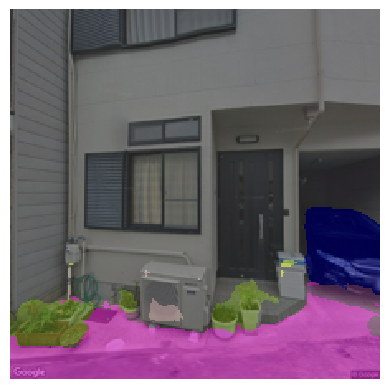

In [ ]:
import matplotlib.pyplot as plt
overlayed_img = Image.blend(Image.fromarray(bottom_images[0]).convert("RGBA"), mask.convert("RGBA"), 0.5)


plt.imshow(overlayed_img, interpolation='nearest')
plt.axis("off")
# plt.imshow(bottom_images[0], interpolation='nearest')

In [ ]:
dict_top50

{(128, 64, 128): 584,
 (244, 35, 232): 7506,
 (70, 70, 70): 37819,
 (102, 102, 156): 0,
 (190, 153, 153): 196,
 (153, 153, 153): 27,
 (250, 170, 30): 0,
 (220, 220, 0): 37,
 (107, 142, 35): 1984,
 (152, 251, 152): 0,
 (70, 130, 180): 0,
 (220, 20, 60): 0,
 (255, 0, 0): 0,
 (0, 0, 142): 2023,
 (0, 0, 70): 0,
 (0, 60, 100): 0,
 (0, 80, 100): 0,
 (0, 0, 230): 0,
 (119, 11, 32): 0}